In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#Author: Ben Lehmann

In [2]:
lemonade = pd.read_csv('C:/Users/Lehma/Downloads/Lemonade2016.csv')
print(lemonade)

         Date Location  Lemon  Orange  Temperature  Leaflets  Price
0    7/1/2016     Park     97      67           70      90.0   0.25
1    7/2/2016     Park     98      67           72      90.0   0.25
2    7/3/2016     Park    110      77           71     104.0   0.25
3    7/4/2016    Beach    134      99           76      98.0   0.25
4    7/5/2016    Beach    159     118           78     135.0   0.25
5    7/6/2016    Beach    103      69           82      90.0   0.25
6    7/6/2016    Beach    103      69           82      90.0   0.25
7    7/7/2016    Beach    143     101           81     135.0   0.25
8         NaN    Beach    123      86           82     113.0   0.25
9    7/9/2016    Beach    134      95           80     126.0   0.25
10  7/10/2016    Beach    140      98           82     131.0   0.25
11  7/11/2016    Beach    162     120           83     135.0   0.25
12  7/12/2016    Beach    130      95           84      99.0   0.25
13  7/13/2016    Beach    109      75           

In [41]:
#Check Nan values
#print(lemonade['Date'].isnull())
#print(lemonade['Leaflets'].isnull())
lemonade.iloc[8,0] = '7/8/2016'  #Locate the NA value and replace it with a Data 

leaflet_mean = round(lemonade['Leaflets'].mean(),1) 
#print(leaflet_mean)
lemonade.loc[20,'Leaflets'] = leaflet_mean  #Locate the NA value of Leaflets

#print(lemonade.duplicated())  #Check for duplicates, the 6th row needs to be removed

lemonade = lemonade.drop_duplicates()  #Drop duplicate

print(lemonade)


         Date Location  Lemon  Orange  Temperature  Leaflets  Price
0    7/1/2016     Park     97      67           70      90.0   0.25
1    7/2/2016     Park     98      67           72      90.0   0.25
2    7/3/2016     Park    110      77           71     104.0   0.25
3    7/4/2016    Beach    134      99           76      98.0   0.25
4    7/5/2016    Beach    159     118           78     135.0   0.25
5    7/6/2016    Beach    103      69           82      90.0   0.25
7    7/7/2016    Beach    143     101           81     135.0   0.25
8    7/8/2016    Beach    123      86           82     113.0   0.25
9    7/9/2016    Beach    134      95           80     126.0   0.25
10  7/10/2016    Beach    140      98           82     131.0   0.25
11  7/11/2016    Beach    162     120           83     135.0   0.25
12  7/12/2016    Beach    130      95           84      99.0   0.25
13  7/13/2016    Beach    109      75           77      99.0   0.25
14  7/14/2016    Beach    122      85           

In [4]:
#print(lemonade)
lemonade['Sales'] = lemonade['Lemon'] + lemonade['Orange']   #Create a new column for Sales and Revenue
lemonade['Revenue'] = lemonade['Sales'] * lemonade['Price']

print(lemonade)

         Date Location  Lemon  Orange  Temperature  Leaflets  Price  Sales  \
0    7/1/2016     Park     97      67           70      90.0   0.25    164   
1    7/2/2016     Park     98      67           72      90.0   0.25    165   
2    7/3/2016     Park    110      77           71     104.0   0.25    187   
3    7/4/2016    Beach    134      99           76      98.0   0.25    233   
4    7/5/2016    Beach    159     118           78     135.0   0.25    277   
5    7/6/2016    Beach    103      69           82      90.0   0.25    172   
6    7/6/2016    Beach    103      69           82      90.0   0.25    172   
7    7/7/2016    Beach    143     101           81     135.0   0.25    244   
8         NaN    Beach    123      86           82     113.0   0.25    209   
9    7/9/2016    Beach    134      95           80     126.0   0.25    229   
10  7/10/2016    Beach    140      98           82     131.0   0.25    238   
11  7/11/2016    Beach    162     120           83     135.0   0

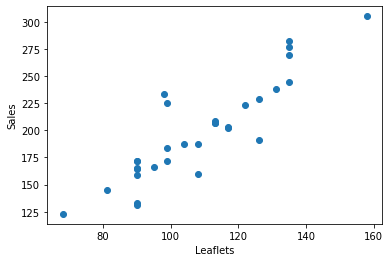

In [5]:
plt.scatter(x=lemonade['Leaflets'], y=lemonade['Sales'])
plt.xlabel('Leaflets')
plt.ylabel('Sales')
plt.show()


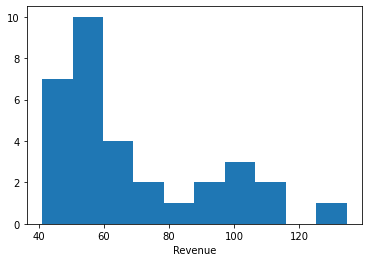

In [6]:
plt.hist(x=lemonade['Revenue'], bins=10)
plt.xlabel('Revenue')
plt.show()

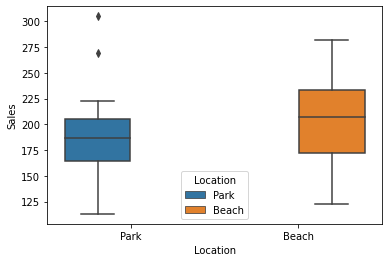

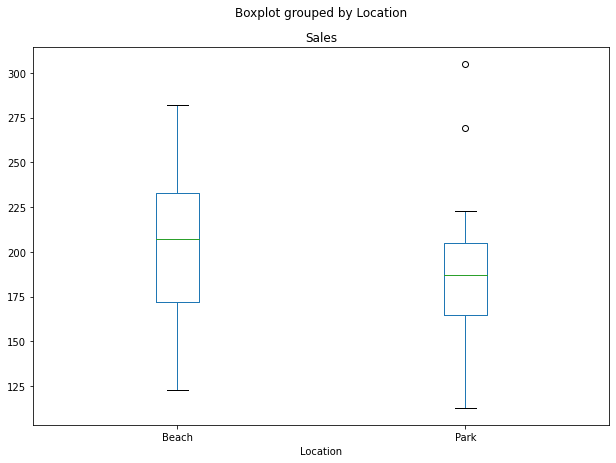

In [9]:
park = lemonade[lemonade['Location'] == 'Park']['Sales']
beach = lemonade[lemonade['Location'] == 'Beach']['Sales']


#sale = lemonade[['Location','Sales']]['Sales']
#location = lemonade[['Location','Sales']]['Location']

#data = [park,beach]
#fig,ax = plt.subplots()
#ax.boxplot(data)
sns.boxplot(x='Location', y='Sales', hue='Location', data=lemonade)
plt.show()

df3 = lemonade.boxplot(column='Sales', by='Location', grid=False, figsize=(10,7))
plt.show()

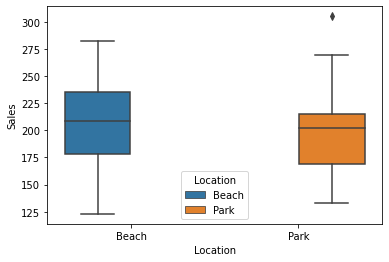

In [69]:
temps = lemonade[lemonade['Temperature'] >= 75]

#print(temps)

sns.boxplot(x='Location',y='Sales', hue='Location', data=temps)
plt.show()

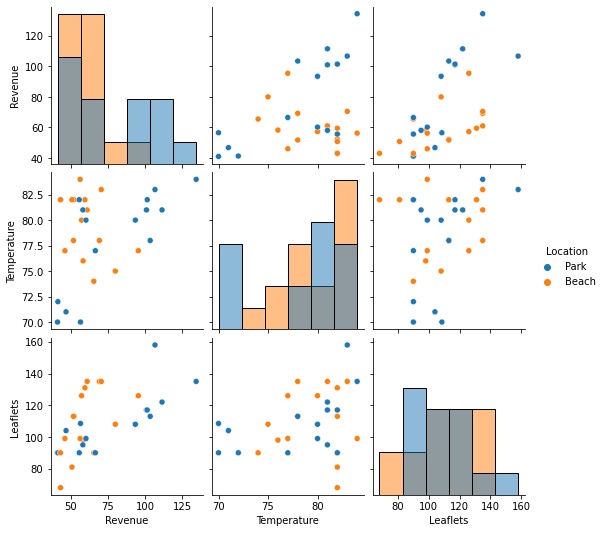

In [82]:
selected = lemonade[['Revenue','Temperature','Leaflets','Location']]
sns.pairplot(selected, hue='Location', diag_kind='hist')  
plt.show()